In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


In [3]:
x1 = np.random.uniform(-10,10, size=(1000,1))
x2 = np.random.uniform(-10,10,size=(1000,1))
noise = np.random.uniform(-1,1,(1000,1))
t = 3*x1 + 7*x2 +5+ noise 

In [4]:
print(t.shape)

(1000, 1)


In [5]:
x = np.column_stack((x1,x2))
print(x.shape)

(1000, 2)


[[0.08032829]
 [0.04957448]]
[0.01331963]
----------
[[2.9883034 ]
 [6.99685267]]
[4.32339588]


Text(0, 0.5, 'output')

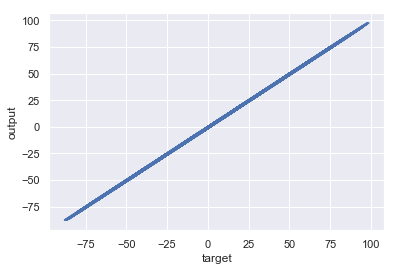

In [7]:
weights = np.random.uniform(-0.1,0.1,size=(2,1))
print(weights)
bias = np.random.uniform(-0.1,0.1,1)
print(bias)
eta = 0.02

for e in range(100):
    y = np.dot(x,weights)+bias
    deltas = (y - t)/1000
    loss = np.sum(deltas**2)/2/1000
#     print("loss: {:.2}".format(loss))
    weights = weights-eta*np.dot(x.T,deltas)
    bias = bias-eta*np.sum(deltas)
    
print("-"*10)
print(weights)
print(bias)
# print(y)

plt.plot(t,y)
plt.xlabel('target')
plt.ylabel('output')

In [9]:
'''
x - feature vector input
w - weights
b - biases
y - output
t - targets

Liear model: x*w+b=y
Loss function: 1/2*sum((y-t)^2)
Loss function gradient: x*(y-t)
Minimization rule: w1 = w0 + eta*(gradient of the loss function w.r.t w)
'''

def loss_function(y,t):
    return np.sum((y-t)**2)/2
                  
                  
def loss_function_gradient(x,y,t):
    return x*(y-t)
                  
                  
class Neuron():
    def __init__(self, initial_weights, initial_biases):
        self.weights = initial_weights
        self.biases = initial_biases
        
    def optimize_weights_biases(self,epochs, eta, x, t):

        for e in range(epochs):
            y = np.dot(x,self.weights)+self.biases
            delta = (y - t)/x.shape[0]
            self.weights = self.weights-eta*np.dot(x.T,delta)
            self.biases = self.biases-eta*np.sum(delta)
        
        return(self.weights,self.biases)
        
        

In [10]:
the_neuron = Neuron(weights, bias)
neuron_weights, neuron_bias = the_neuron.optimize_weights_biases(100, eta, x, t)
print(neuron_weights, neuron_bias)

[[2.99211551]
 [6.99666787]] [4.89889648]
